# Importing Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import scipy.stats as stats
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df=pd.read_csv('churn_prediction.csv')

In [3]:
df.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28382 entries, 0 to 28381
Data columns (total 21 columns):
customer_id                       28382 non-null int64
vintage                           28382 non-null int64
age                               28382 non-null int64
gender                            27857 non-null object
dependents                        25919 non-null float64
occupation                        28302 non-null object
city                              27579 non-null float64
customer_nw_category              28382 non-null int64
branch_code                       28382 non-null int64
days_since_last_transaction       25159 non-null float64
current_balance                   28382 non-null float64
previous_month_end_balance        28382 non-null float64
average_monthly_balance_prevQ     28382 non-null float64
average_monthly_balance_prevQ2    28382 non-null float64
current_month_credit              28382 non-null float64
previous_month_credit             28382 non-null

In [5]:
df.shape

(28382, 21)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,28382.0,15143.508667,8746.454456,1.00,7557.2500,15150.500,22706.7500,30301.00
vintage,28382.0,2364.336446,1610.124506,180.00,1121.0000,2018.000,3176.0000,12899.00
age,28382.0,48.208336,17.807163,1.00,36.0000,46.000,60.0000,90.00
dependents,25919.0,0.347236,0.997661,0.00,0.0000,0.000,0.0000,52.00
city,27579.0,796.109576,432.872102,0.00,409.0000,834.000,1096.0000,1649.00
customer_nw_category,28382.0,2.225530,0.660443,1.00,2.0000,2.000,3.0000,3.00
branch_code,28382.0,925.975019,937.799129,1.00,176.0000,572.000,1440.0000,4782.00
days_since_last_transaction,25159.0,69.997814,86.341098,0.00,11.0000,30.000,95.0000,365.00
current_balance,28382.0,7380.551804,42598.711923,-5503.96,1784.4700,3281.255,6635.8200,5905904.03
previous_month_end_balance,28382.0,7495.770548,42529.345225,-3149.57,1906.0000,3379.915,6656.5350,5740438.63


In [7]:
df.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dtype: object

# Exploratory Data Analysis

## Univariate Analysys

(array([9.997e+03, 8.818e+03, 4.218e+03, 3.433e+03, 1.517e+03, 3.920e+02,
        3.000e+00, 1.000e+00, 2.000e+00, 1.000e+00]),
 array([  180. ,  1451.9,  2723.8,  3995.7,  5267.6,  6539.5,  7811.4,
         9083.3, 10355.2, 11627.1, 12899. ]),
 <a list of 10 Patch objects>)

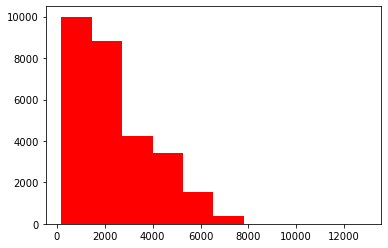

In [8]:
plt.hist(df['vintage'], color='red')

The maximum coustomer vintage withe bank is between 1000 to 5000 days.

(array([ 343.,  531., 1902., 4989., 6135., 4886., 3849., 2984., 1392.,
        1371.]),
 array([ 1. ,  9.9, 18.8, 27.7, 36.6, 45.5, 54.4, 63.3, 72.2, 81.1, 90. ]),
 <a list of 10 Patch objects>)

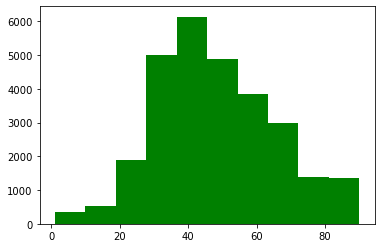

In [9]:
plt.hist(df['age'], color='green')

***Here clearly seen some of the customer age is 0 to 10 which is not valid. and also seen coustomer age is lies between 20 to 70 year***

In [10]:
df['dependents'].value_counts()

0.0     21435
2.0      2150
1.0      1395
3.0       701
4.0       179
5.0        41
6.0         8
7.0         3
36.0        1
52.0        1
25.0        1
9.0         1
50.0        1
32.0        1
8.0         1
Name: dependents, dtype: int64

In [11]:
df['dependents'].value_counts()/len(df['dependents'])

0.0     0.755232
2.0     0.075752
1.0     0.049151
3.0     0.024699
4.0     0.006307
5.0     0.001445
6.0     0.000282
7.0     0.000106
36.0    0.000035
52.0    0.000035
25.0    0.000035
9.0     0.000035
50.0    0.000035
32.0    0.000035
8.0     0.000035
Name: dependents, dtype: float64

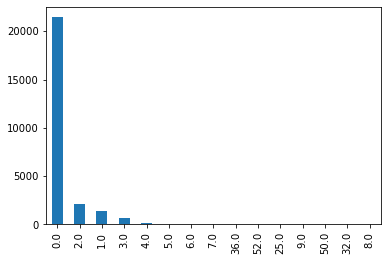

In [12]:
df['dependents'].value_counts().plot.bar()

Here clearly seen the number of dependents of maximum coustomer is 0, and very few coustomer have more than 3 dependents. more cleary image we draw a percentage bar graph

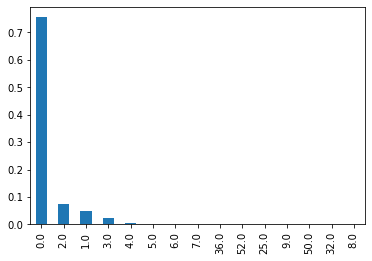

In [13]:
(df['dependents'].value_counts()/len(df['dependents'])).plot.bar()

here we cleary say that 75 percent of coustomer have 0 dependents, 9 percent have 2 dependents , 6 percent have 1 dependents and less tahn 5 percent have 3 dependents

In [14]:
df['gender'].value_counts()

Male      16548
Female    11309
Name: gender, dtype: int64

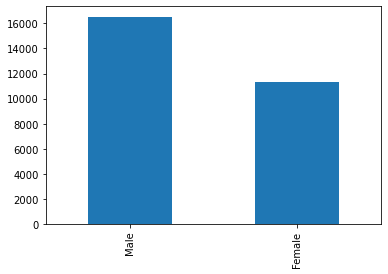

In [15]:
df['gender'].value_counts().plot.bar()

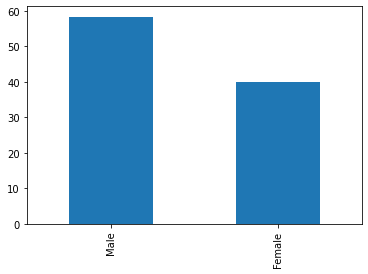

In [16]:
(df['gender'].value_counts()/len(df['gender'])*100).plot.bar()

Here clearly seen that 60 percent coustomer is male and 40 percent have female

In [17]:
df['occupation'].value_counts()

self_employed    17476
salaried          6704
student           2058
retired           2024
company             40
Name: occupation, dtype: int64

In [18]:
df['occupation'].value_counts()/len(df['occupation'])*100

self_employed    61.574237
salaried         23.620605
student           7.251075
retired           7.131280
company           0.140934
Name: occupation, dtype: float64

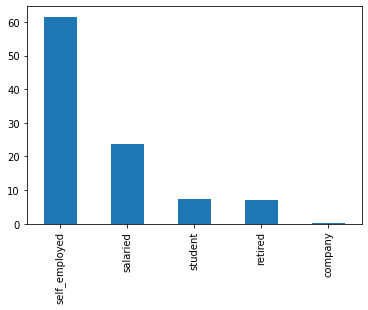

In [19]:
(df['occupation'].value_counts()/len(df['occupation'])*100).plot.bar()

60 percent of coustomer have self employed, very few percent of coustomer have company, and  23 percent is salaried and 7 percent is student and retaired

In [20]:
df['customer_nw_category'].value_counts()

2    14559
3    10112
1     3711
Name: customer_nw_category, dtype: int64

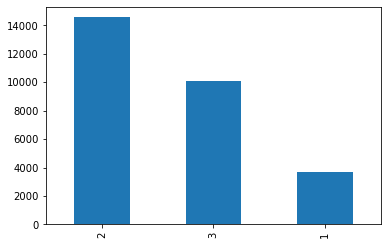

In [21]:
df['customer_nw_category'].value_counts().plot.bar()

It is not very meaningfull for better insight draw a percentage bar graph

In [22]:
df['customer_nw_category'].value_counts()/len(df['customer_nw_category'])*100

2    51.296596
3    35.628215
1    13.075188
Name: customer_nw_category, dtype: float64

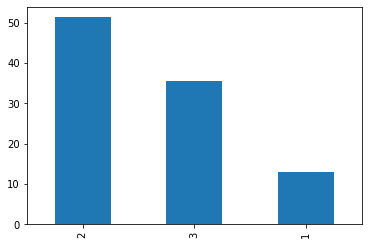

In [23]:
(df['customer_nw_category'].value_counts()/len(df['customer_nw_category'])*100).plot.bar()

here, 51 percent of coustomer have medium net worth, 35 percent have low net worth and 13 percent having high net worth

In [24]:
df['churn'].value_counts()

0    23122
1     5260
Name: churn, dtype: int64

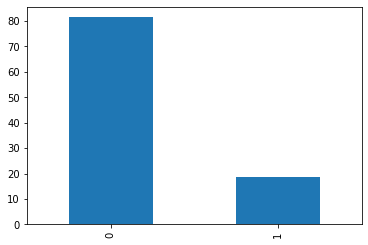

In [25]:
(df['churn'].value_counts()/len(df['churn'])*100).plot.bar()

The predictive having 80 percent  0 values and only 15 percent  1 values. so the data is imbalnced we want to handle it 

## Bi-Variate Analysis

In [26]:
df.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code',
       'days_since_last_transaction', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn'],
      dtype='object')

In [27]:
df.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dtype: object

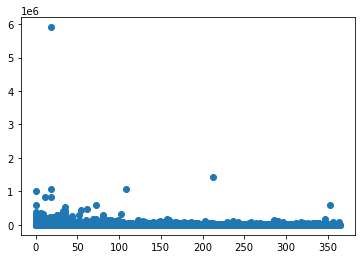

In [28]:
plt.scatter(df['days_since_last_transaction'], df['current_balance'])

In [29]:
hm=df.corr()

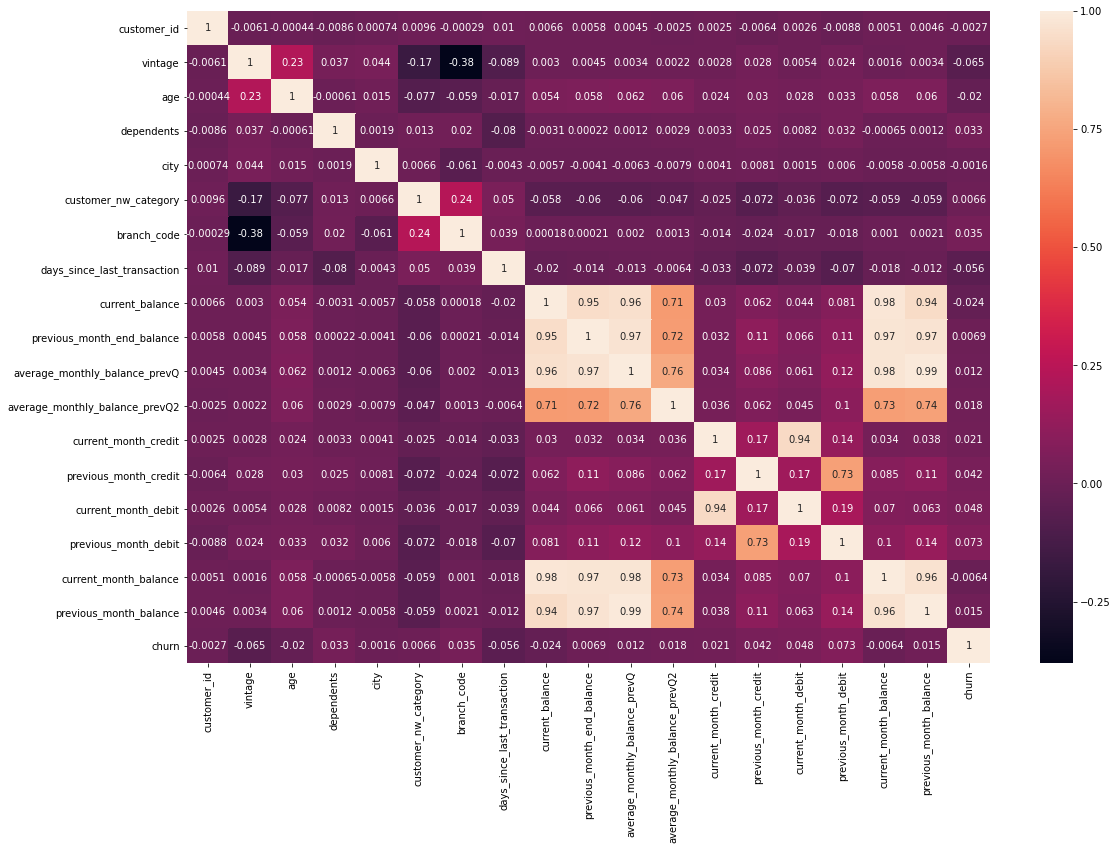

In [30]:
plt.figure(figsize=(18,12))
sns.heatmap(hm, 
            xticklabels = hm.columns.values,
            yticklabels = hm.columns.values,
            annot = True)

Here lots of varible have postivily or negativily co related , describe some.
previous_month_balnce postivily corelate with current balnce , previus month end balance postivily corelate with previous month balnce. so in clening we drop one of them which is positivily corelate with each other.
becouse both are same in imapct of predictive variable.

In [31]:
fh=df.groupby('gender')['age']

In [32]:
fh.mean()

gender
Female    46.249536
Male      48.239425
Name: age, dtype: float64

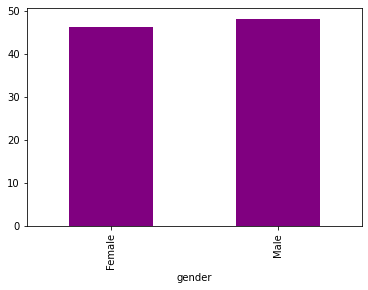

In [33]:
fh.mean().plot.bar(color='purple')

mean age of male is 48 and for female it is 46

In [34]:
gg=df.groupby('occupation')['age']

In [35]:
gg.mean()

occupation
company          69.825000
retired          72.173419
salaried         44.077416
self_employed    50.303902
student          19.408649
Name: age, dtype: float64

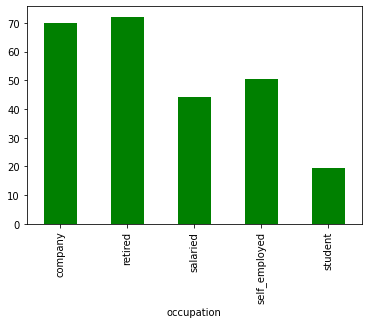

In [36]:
gg.mean().plot.bar(color='green')

student mean is is 19 , retaired coutomer mean age is 72 self employed mean age 50

In [37]:
male=df[df['gender']=='Male']

In [38]:
female=df[df['gender']=='Female']

In [39]:
ttest_ind(male['age'], female['age'])

Ttest_indResult(statistic=9.596318583925742, pvalue=8.953496870492096e-22)

In [40]:


stats.f_oneway(df['age'][df['occupation'] == 'company'],
               df['age'][df['occupation'] == 'retired'],
               df['age'][df['occupation'] == 'salaried'],
                df['age'][df['occupation'] == 'self_employed'],
                df['age'][df['occupation'] == 'student']
               
               
               )


F_onewayResult(statistic=3702.824995965189, pvalue=0.0)

In [41]:
pd.crosstab(df['gender'],df['occupation'])

occupation,company,retired,salaried,self_employed,student
gender,,,,,
Female,6,389,1838,8053,1006
Male,28,1634,4864,8911,1052


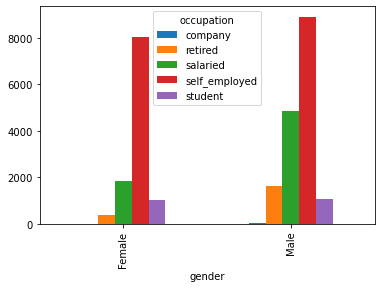

In [42]:
pd.crosstab(df['gender'],df['occupation']).plot.bar()

In [43]:
chi2_contingency(pd.crosstab(df['gender'],df['occupation']))

(1263.1194370636574,
 3.297621316393365e-272,
 4,
 array([[   13.8198049 ,   822.27839171,  2724.12742522,  6895.26971671,
           836.50466146],
        [   20.1801951 ,  1200.72160829,  3977.87257478, 10068.73028329,
          1221.49533854]]))

In [44]:
pd.crosstab(df['gender'],df['churn'])

churn,0,1
gender,,
Female,9324,1985
Male,13379,3169


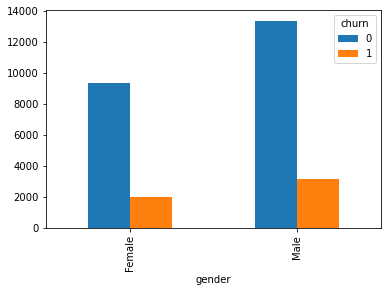

In [45]:
pd.crosstab(df['gender'],df['churn']).plot.bar()

In [46]:
chi2_contingency(pd.crosstab(df['gender'],df['churn']))

(11.270738823296812,
 0.0007873838498074115,
 1,
 array([[ 9216.65028539,  2092.34971461],
        [13486.34971461,  3061.65028539]]))

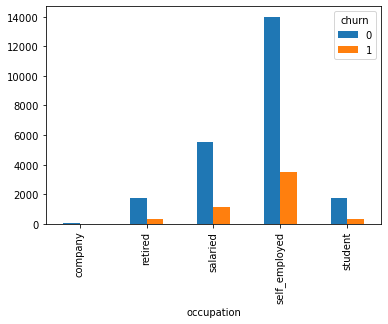

In [47]:
pd.crosstab(df['occupation'],df['churn']).plot.bar()

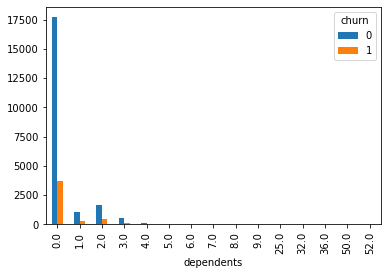

In [48]:
pd.crosstab(df['dependents'],df['churn']).plot.bar()

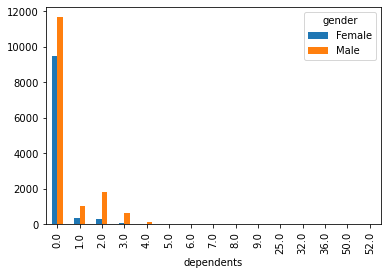

In [49]:
pd.crosstab(df['dependents'],df['gender']).plot.bar()

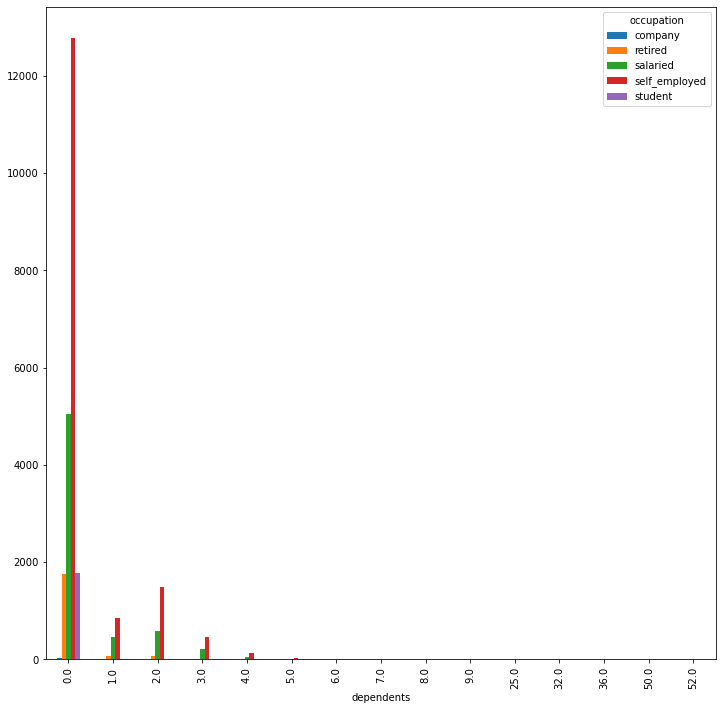

In [50]:
pd.crosstab(df['dependents'],df['occupation']).plot.bar(figsize=(12,12))

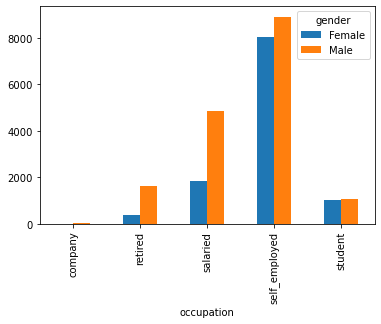

In [51]:
pd.crosstab(df['occupation'],df['gender']).plot.bar()

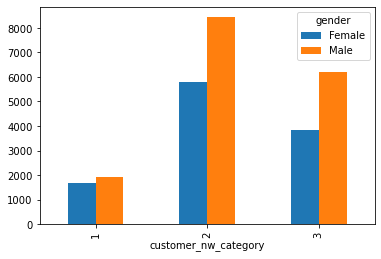

In [52]:
pd.crosstab(df['customer_nw_category'],df['gender']).plot.bar()

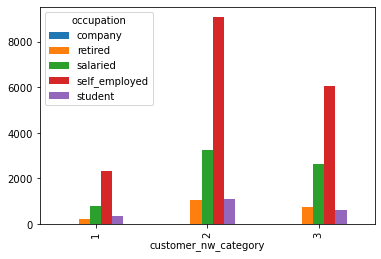

In [53]:
pd.crosstab(df['customer_nw_category'],df['occupation']).plot.bar()

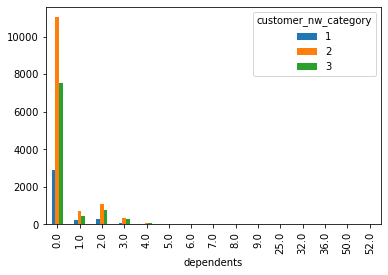

In [54]:
pd.crosstab(df['dependents'],df['customer_nw_category']).plot.bar()

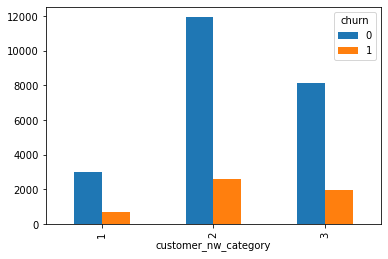

In [55]:
pd.crosstab(df['customer_nw_category'],df['churn']).plot.bar()

In [56]:
df.groupby('dependents')['age'].mean()

dependents
0.0     48.307954
1.0     48.377778
2.0     48.009302
3.0     48.907275
4.0     49.743017
5.0     45.975610
6.0     43.750000
7.0     47.666667
8.0     56.000000
9.0     35.000000
25.0    30.000000
32.0    45.000000
36.0    41.000000
50.0    58.000000
52.0    43.000000
Name: age, dtype: float64

In [57]:
df.groupby('customer_nw_category')['age'].mean()

customer_nw_category
1    51.109404
2    48.483962
3    46.746835
Name: age, dtype: float64

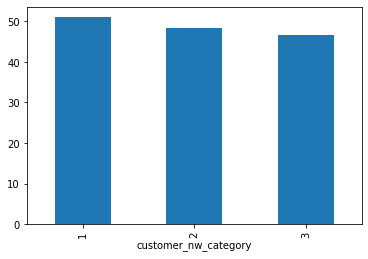

In [58]:
df.groupby('customer_nw_category')['age'].mean().plot.bar()

In [59]:
chi2_contingency(pd.crosstab(df['occupation'],df['churn']))

(57.33701557319584,
 1.051286209239775e-11,
 4,
 array([[3.25842697e+01, 7.41573034e+00],
        [1.64876404e+03, 3.75235955e+02],
        [5.46112360e+03, 1.24287640e+03],
        [1.42360674e+04, 3.23993258e+03],
        [1.67646067e+03, 3.81539326e+02]]))

In [60]:
df.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

# Data Preprocessing

## Create dummy varible for gender and fill NaN values

In [61]:
df.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

Fill gender by mode value

In [62]:
df['gender']=pd.get_dummies(df['gender'],drop_first=True)

In [63]:
df['gender'].fillna(df['gender'].mode(),inplace=True)

In [64]:
df.shape

(28382, 21)

fill occupation we anlysys if age is less than 20 so it is student and age is more tahn 70 so there is high chance of retaired person. and if dependents is 0 so there is high chance of student

In [65]:
df.loc[(df['age']<=25 ) & (df['occupation'].isnull()), 'occupation'] = 'student'

In [66]:
df.loc[(df['age']>=70 ) & (df['occupation'].isnull()), 'occupation'] = 'retired'

In [67]:
df.loc[(df['dependents']==0 ) & (df['occupation'].isnull()), 'occupation'] = 'student'

fill dpendents if occupation is student dependent is zero and age is less than 25 dependent is also zero

In [68]:
df.loc[(df['occupation'] == 'student' ) & (df['dependents'].isnull()), 'dependents'] = 0

In [69]:
df.loc[(df['occupation'] == 'retired' ) & (df['dependents'].isnull()), 'dependents'] = 2

In [70]:
df.loc[(df['age']<=25 ) & (df['dependents'].isnull()), 'dependents'] = 0

In [71]:
df.loc[(df['age']<=30 ) & (df['dependents'].isnull()), 'dependents'] = 1

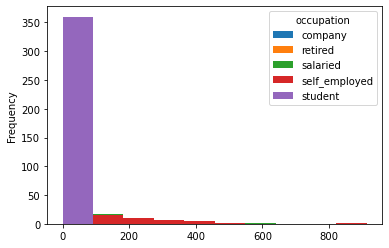

In [72]:
pd.crosstab(df['days_since_last_transaction'],df['occupation']).plot.hist()

here clearly seen day since last transaction less than 100 is always a student

In [73]:
df.loc[(df['days_since_last_transaction']<=100 ) & (df['occupation'].isnull()), 'occupation'] = 'student'

In [74]:
df.loc[(df['days_since_last_transaction']<=400 ) & (df['occupation'].isnull()), 'occupation'] = 'self_employed'

if a occupation is student so day since last trasction is between 1 to 100

In [75]:
df.loc[(df['occupation']=='student' ) & (df['days_since_last_transaction'].isnull()), 'days_since_last_transaction'] = 50

In [76]:
df.loc[(df['occupation']=='self_employed' ) & (df['days_since_last_transaction'].isnull()), 'days_since_last_transaction'] = 250

In [77]:

df.drop(df[df['dependents'] >6].index, inplace = True)

## drop Unwanted columns or postivily corelated columns

In [78]:
df.drop(['current_balance','previous_month_end_balance','average_monthly_balance_prevQ','average_monthly_balance_prevQ2','branch_code','customer_id','city','previous_month_balance'],axis=1, inplace=True)

In [79]:
df.isnull().sum()

vintage                           0
age                               0
gender                            0
dependents                     1743
occupation                        1
customer_nw_category              0
days_since_last_transaction     888
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
churn                             0
dtype: int64

## Drop all the Nan value

In [80]:
df.dropna(inplace=True)

In [81]:
df.shape

(25773, 13)

## outlier detection

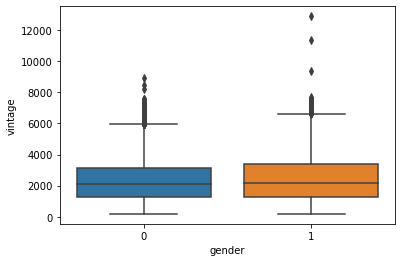

In [82]:
sns.boxplot(x="gender", y="vintage", data=df)

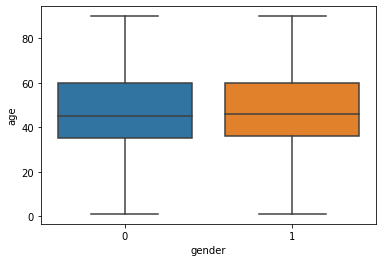

In [83]:
sns.boxplot(x="gender", y="age", data=df)

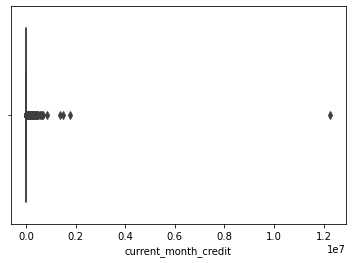

In [84]:
sns.boxplot(df['current_month_credit'])

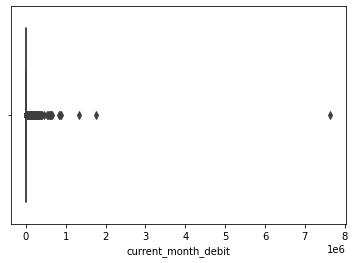

In [85]:
sns.boxplot(df['current_month_debit'])

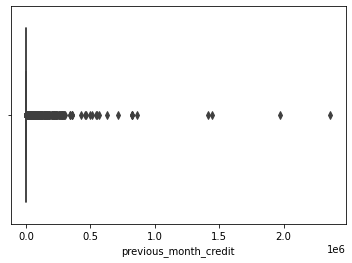

In [86]:
sns.boxplot(df['previous_month_credit'])

In [87]:
df.columns

Index(['vintage', 'age', 'gender', 'dependents', 'occupation',
       'customer_nw_category', 'days_since_last_transaction',
       'current_month_credit', 'previous_month_credit', 'current_month_debit',
       'previous_month_debit', 'current_month_balance', 'churn'],
      dtype='object')

In [88]:
data=df[['vintage','days_since_last_transaction','current_month_credit','previous_month_credit','current_month_debit','previous_month_debit','current_month_balance']].copy()

In [89]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

vintage                        2018.00
days_since_last_transaction     106.00
current_month_credit            756.27
previous_month_credit           857.26
current_month_debit            1428.40
previous_month_debit           1428.43
current_month_balance          4643.03
dtype: float64


In [90]:
data1 = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data1.shape

(14728, 7)

In [91]:
data2=df[['age','gender','dependents','occupation','customer_nw_category','churn']]

In [92]:
new = data1.merge(data2, left_index=True, right_index=True)

In [93]:
(new['churn'].value_counts()/len(new['churn'])*100)

0    87.106192
1    12.893808
Name: churn, dtype: float64

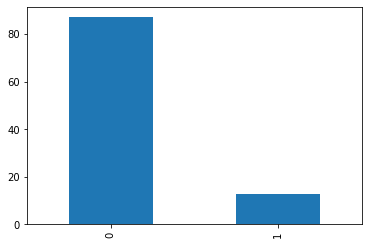

In [94]:
(new['churn'].value_counts()/len(new['churn'])*100).plot.bar()

# Feature Selection

In [95]:
encoder=LabelEncoder()
new['occupation']= encoder.fit_transform(new['occupation']) 

In [96]:
new.head(2)

,vintage,days_since_last_transaction,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,age,gender,dependents,occupation,customer_nw_category,churn
0,3135,224.0,0.20,0.20,0.20,0.20,1458.71,66,1,0.0,3,2,0
4,2531,58.0,0.33,714.61,588.62,1538.06,1157.15,42,1,2.0,3,3,1


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.09831452 0.09130809 0.09099249 0.08483341 0.1429993  0.10884871
 0.16354678 0.09721364 0.01502067 0.02963389 0.04005166 0.03723684]


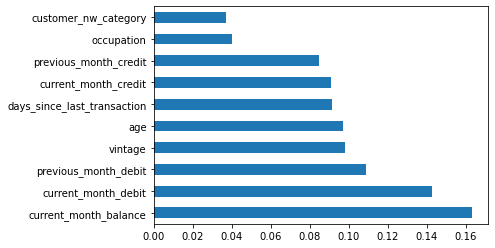

In [97]:

X = new.iloc[:,0:12]  #independent columns
y = new.iloc[:,-1]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [126]:
new=new[['vintage','days_since_last_transaction','current_month_credit','previous_month_credit','current_month_debit','previous_month_debit','current_month_balance','age','occupation','customer_nw_category']].copy()

# standradization of data

In [142]:
from sklearn import preprocessing
# Get column names first
names = new.columns
# Create the Scaler object
scaler = preprocessing.MinMaxScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(new)
scaled_df = pd.DataFrame(scaled_df, columns=names)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [143]:
scaled_df.head()

,vintage,days_since_last_transaction,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,age,occupation,customer_nw_category
0,0.483080,0.808664,0.000101,0.000089,0.000053,0.000053,0.284645,0.730337,0.75,0.5
1,0.384339,0.209386,0.000169,0.333383,0.165133,0.430650,0.266884,0.460674,0.75,1.0
2,0.938695,0.353791,0.000333,0.000294,0.364608,0.122989,0.615492,0.797753,0.25,0.0
3,0.319111,0.068592,0.378218,0.056488,0.200451,0.100640,0.268433,0.337079,0.50,0.5
4,0.078633,0.018051,0.234707,0.000247,0.000149,0.058458,0.293351,0.752809,0.25,1.0


In [125]:
scaler.(np.array([232,1234,24,432,23,34,12,354,23,52,14,15,15]).reshape(-1,1))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


MinMaxScaler(copy=True, feature_range=(0, 1))

In [140]:
tt=scaler.transform(np.array([12,12,12,12,12,12,12,12,12,12]).reshape(-1,1).T)

In [141]:
scaler.inverse_transform(tt)

array([[12., 12., 12., 12., 12., 12., 12., 12., 12., 12.]])

# Predictive Modeling

In [179]:
x=scaled_df[['vintage','days_since_last_transaction','current_month_credit','previous_month_credit','current_month_debit','previous_month_debit','current_month_balance','age','occupation','customer_nw_category']].copy()
y=scaled_df.iloc[:,-1]

In [180]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size =0.2,stratify = y)

In [181]:
model1=RandomForestClassifier(n_estimators=200)
model1.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [182]:
y_pred=model1.predict(X_test)

In [183]:
confusion_matrix(y_test,y_pred)

array([[2521,   45],
       [ 283,   97]], dtype=int64)

In [184]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94      2566
         1.0       0.68      0.26      0.37       380

   micro avg       0.89      0.89      0.89      2946
   macro avg       0.79      0.62      0.66      2946
weighted avg       0.87      0.89      0.87      2946



In [185]:
accuracy_score(y_test,y_pred)

0.8886625933469111

In [186]:
model2 = KNeighborsClassifier(n_neighbors=3)
model2.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [187]:
y_pred1=model2.predict(X_test)

In [188]:
confusion_matrix(y_test,y_pred1)

array([[2455,  111],
       [ 325,   55]], dtype=int64)

In [189]:
accuracy_score(y_test,y_pred1)

0.8520027155465038

In [190]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92      2566
         1.0       0.33      0.14      0.20       380

   micro avg       0.85      0.85      0.85      2946
   macro avg       0.61      0.55      0.56      2946
weighted avg       0.81      0.85      0.83      2946



In [191]:
from sklearn.linear_model import LogisticRegression
model3=LogisticRegression()
model3.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [192]:
y_pred3=model3.predict(X_test)

In [193]:
accuracy_score(y_test,y_pred3)

0.8699932111337406

In [194]:
confusion_matrix(y_test,y_pred3)

array([[2543,   23],
       [ 360,   20]], dtype=int64)

In [195]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93      2566
         1.0       0.47      0.05      0.09       380

   micro avg       0.87      0.87      0.87      2946
   macro avg       0.67      0.52      0.51      2946
weighted avg       0.82      0.87      0.82      2946



In [196]:
from sklearn.tree import DecisionTreeClassifier
model4=DecisionTreeClassifier()
model4.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [197]:
y_pred4=model4.predict(X_test)

In [198]:
accuracy_score(y_test,y_pred4)

0.8156822810590632

In [199]:
confusion_matrix(y_test,y_pred4)

array([[2274,  292],
       [ 251,  129]], dtype=int64)

In [200]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

         0.0       0.90      0.89      0.89      2566
         1.0       0.31      0.34      0.32       380

   micro avg       0.82      0.82      0.82      2946
   macro avg       0.60      0.61      0.61      2946
weighted avg       0.82      0.82      0.82      2946



# Hyper parameter Tuning

In [204]:
from sklearn.model_selection import train_test_split, GridSearchCV
# xgboost classifier
# https://xgboost.readthedocs.io/en/latest/python/python_api.html
from xgboost import XGBClassifier
from sklearn.svm import SVC


In [206]:
def gridsearchfn(X_train_data, X_test_data, y_train_data, y_test_data, 
                       model, param_grid, cv=5, scoring_fit='accuracy'):
    gs = GridSearchCV(
        estimator=model,
        param_grid=param_grid, 
        cv=cv, 
        n_jobs=-1, 
        scoring=scoring_fit,
        verbose=2
    )
    fitted_model = gs.fit(X_train_data, y_train_data)
    
    return fitted_model

In [207]:
# define xgboost classifier with random state 0 as model. 
model = XGBClassifier(random_state=0)

# parameter grid is defined inorder to search through and get the best fit parameters
param_grid = {
    'max_depth': [5,10,15,20,25,30,35,40,45,50],
    'eta': [0.001, 0.01, 0.1, 1],
    'gamma': [0, 0.1 , 1, 2, 5]
}

# invoke the gridsearch function to get the best fit model and parameters
model = gridsearchfn(X_train, X_test, y_train, y_test, model, param_grid)

# print the best parameters
print('Best Parameters : ', model.best_params_)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 22.4min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 35.8min finished


Best Parameters :  {'eta': 0.001, 'gamma': 5, 'max_depth': 5}


In [208]:
xgbclf = XGBClassifier(eta= 0.001, gamma= 5, max_depth= 5, random_state=0)
xgbclf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, eta=0.001, gamma=5,
       learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [209]:
y_pred4=xgbclf.predict(X_test)

In [210]:
accuracy_score(y_test,y_pred4)

0.8893414799728445

In [211]:
confusion_matrix(y_test,y_pred4)

array([[2532,   34],
       [ 292,   88]], dtype=int64)

In [212]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94      2566
         1.0       0.72      0.23      0.35       380

   micro avg       0.89      0.89      0.89      2946
   macro avg       0.81      0.61      0.65      2946
weighted avg       0.87      0.89      0.86      2946



In [214]:
# define Support Vector Machine classifier with random state as 0 as model. 
model = SVC(random_state=0)

# parameter grid is defined inorder to search through and get the best fit parameters
param_grid = {
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid']
}

# invoke the gridsearch function to get the best fit model and parameters
model = gridsearchfn(X_train, X_test, y_train, y_test, model, param_grid)

print('Best Parameters : ', model.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   17.9s finished


Best Parameters :  {'kernel': 'linear'}


In [215]:
svcclf = SVC(kernel = 'linear', random_state=0, probability=True)
svcclf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=True, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [216]:
y_pred4=svcclf.predict(X_test)

In [217]:
accuracy_score(y_test,y_pred4)

0.8710115410726409

In [218]:
confusion_matrix(y_test,y_pred4)

array([[2566,    0],
       [ 380,    0]], dtype=int64)

In [219]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93      2566
         1.0       0.00      0.00      0.00       380

   micro avg       0.87      0.87      0.87      2946
   macro avg       0.44      0.50      0.47      2946
weighted avg       0.76      0.87      0.81      2946



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [220]:
# define xgboost classifier with random state as 0 as model. 
model = RandomForestClassifier(random_state=0)

# parameter grid is defined inorder to search through and get the best fit parameters
param_grid = {
    'n_estimators': [20,40,60],
    'criterion' : ['gini', 'entropy'],
    'min_samples_split' : [2,4,6],
    'max_depth' : [100,200,300],
    'bootstrap' : [True, False]
    
}

# invoke the gridsearch function to get the best fit model and parameters
model = gridsearchfn(X_train, X_test, y_train, y_test, model, param_grid)

print('Best Parameters : ', model.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   58.1s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  5.3min finished


Best Parameters :  {'bootstrap': True, 'criterion': 'gini', 'max_depth': 100, 'min_samples_split': 6, 'n_estimators': 60}


In [221]:
# Best Parameters :  {'bootstrap': True, 'criterion': 'gini', 'max_depth': 100, 'min_samples_split': 6, 'n_estimators': 40}
rndfclf = RandomForestClassifier(bootstrap = True, criterion = 'gini', max_depth = 100, min_samples_split =6,
                        n_estimators= 60, random_state=0)
rndfclf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=100, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=6,
            min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [222]:
y_pred4=rndfclf.predict(X_test)

In [223]:
accuracy_score(y_test,y_pred4)

0.8893414799728445

In [224]:
confusion_matrix(y_test,y_pred4)

array([[2523,   43],
       [ 283,   97]], dtype=int64)

In [225]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94      2566
         1.0       0.69      0.26      0.37       380

   micro avg       0.89      0.89      0.89      2946
   macro avg       0.80      0.62      0.66      2946
weighted avg       0.87      0.89      0.87      2946



## In all above the model random forest model is performing well its accuracy is 88.9 and f1 score is 94 and 37 it is best comparision to other

In [230]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rndfclf, file)

In [ ]:
x=scaled_df[['vintage','days_since_last_transaction','current_month_credit','previous_month_credit','current_month_debit','previous_month_debit','current_month_balance','age','occupation','customer_nw_category']].co

In [232]:
X_test.head()

,vintage,days_since_last_transaction,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,age,occupation,customer_nw_category
5708,0.086153,0.223827,0.000106,0.000093,0.000258,0.051654,0.289813,0.393258,0.50,1.0
12124,0.159719,0.209386,0.000206,0.133475,0.000109,0.000109,0.455041,0.640449,0.75,0.5
14324,0.209253,0.180505,0.000132,0.000117,0.000070,0.000070,0.357071,0.134831,1.00,0.5
12888,0.308648,0.072202,0.474946,0.418586,0.000025,0.000025,0.608040,0.359551,0.75,0.0
4735,0.748079,0.176895,0.000333,0.117207,0.000177,0.000176,0.698916,0.426966,0.50,0.5


In [146]:
file_name = "minmax.pickle"
pickle.dump(scaler,open(file_name,'wb'))

In [147]:
import pickle
ss = pickle.load(open('minmax.pickle', 'rb'))

In [153]:
bb = ss.transform(np.array([400,234,34,234,4,23,46,24,23,22]).reshape(-1,1).T)

In [154]:
ss.inverse_transform(bb)

array([[400., 234.,  34., 234.,   4.,  23.,  46.,  24.,  23.,  22.]])

In [152]:
aa = pickle.load(open('random_forest_regression_model.pkl', 'rb'))

In [156]:
aa.predict(bb)

array([1.])